In [1]:
#loaded the required libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import (RandomOverSampler)
from io import StringIO

In [2]:
os.getcwd()

'/Users/arvindpawar'

In [3]:
#path
os.chdir('/Users/arvindpawar/Desktop/Fifth Quarter/Capstone/Data/')

In [4]:
os.listdir()

['seriesA_final.csv',
 '.DS_Store',
 'StartupFile_USA_Final.csv',
 'crunchbase-investments.csv',
 'companies.csv',
 'crunchbase-acquisitions.csv',
 'clean_companies_usa_df.csv',
 'seed_final.csv',
 'crunchbase-rounds.csv',
 'crunchbase-companies.csv']

In [5]:
seed_df=pd.read_csv('/Users/arvindpawar/Desktop/Fifth Quarter/Capstone/Data/seed_final.csv')

In [6]:
seed_df.head()

,size_numeric,years,Austin,San Francisco,Seattle,Big_Data_Analytics,Crowdsourcing,Health_Care_Information_Technology,Mobile_Games,Predictive_Analytics,raised_2m
0,5,7.627397,0,0,0,0,0,0,0,0,0
1,25,5.375342,0,1,0,0,0,0,0,0,1
2,25,6.290411,0,0,0,0,0,0,0,0,0
3,25,3.871233,0,0,1,0,0,0,0,0,0
4,5,7.290411,0,0,0,0,0,0,0,0,0


In [7]:
seed_df.shape

(1912, 11)

In [8]:
seed_df.isnull().sum()

size_numeric                          0
years                                 0
Austin                                0
San Francisco                         0
Seattle                               0
Big_Data_Analytics                    0
Crowdsourcing                         0
Health_Care_Information_Technology    0
Mobile_Games                          0
Predictive_Analytics                  0
raised_2m                             0
dtype: int64

In [9]:
two_million=seed_df.copy()

In [10]:
two_million

,size_numeric,years,Austin,San Francisco,Seattle,Big_Data_Analytics,Crowdsourcing,Health_Care_Information_Technology,Mobile_Games,Predictive_Analytics,raised_2m
0,5,7.627397,0,0,0,0,0,0,0,0,0
1,25,5.375342,0,1,0,0,0,0,0,0,1
2,25,6.290411,0,0,0,0,0,0,0,0,0
3,25,3.871233,0,0,1,0,0,0,0,0,0
4,5,7.290411,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1907,5,4.627397,0,0,0,0,0,0,0,0,0
1908,5,5.871233,0,0,0,1,0,0,0,0,0
1909,25,7.208219,0,0,0,0,0,0,0,0,0
1910,25,7.794521,0,0,0,0,0,0,0,0,0


In [11]:
two_million['raised_2m'].value_counts()

0    1570
1     342
Name: raised_2m, dtype: int64

In [12]:
data_for_kaplan=two_million.loc[:, ['years','raised_2m']]

In [13]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [14]:
kmf.fit(durations = data_for_kaplan.years,
           event_observed = data_for_kaplan.raised_2m)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1912 total observations, 1570 right-censored observations>

In [15]:
kmf.survival_function_

,KM_estimate
timeline,
0.000000,1.000000
0.624658,1.000000
1.539726,1.000000
2.205479,1.000000
2.372603,0.999476
...,...
9.126027,0.383864
9.210959,0.383864
9.293151,0.383864


In [20]:
kmf.event_table
kmf.predict(3)

0.9931710800464316

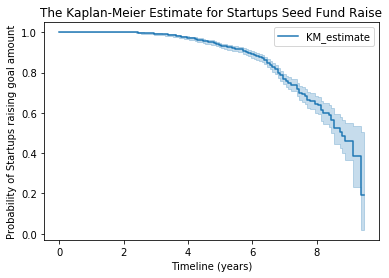

In [21]:
# plot the KM estimate 
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for Startups Seed Fund Raise")
plt.ylabel("Probability of Startups raising goal amount")
plt.xlabel("Timeline (years)")
plt.show()

In [23]:
### Cox proportional hazard regression model
from lifelines import CoxPHFitter

In [24]:


# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object


In [30]:
cph.fit(two_million, 'years', event_col='raised_2m') 

<lifelines.CoxPHFitter: fitted with 1912 total observations, 1570 right-censored observations>

In [31]:
cph.print_summary()

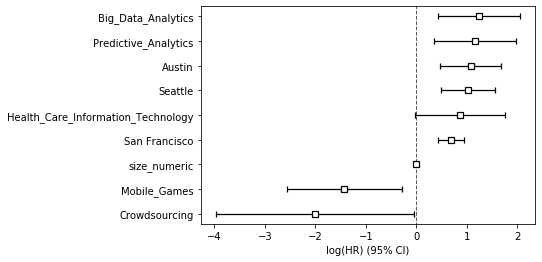

In [32]:
cph.plot()

In [53]:
two_million.shape

(1912, 11)

In [89]:
two_million

,size_numeric,years,Austin,San Francisco,Seattle,Big_Data_Analytics,Crowdsourcing,Health_Care_Information_Technology,Mobile_Games,Predictive_Analytics,raised_2m
0,5,7.627397,0,0,0,0,0,0,0,0,0
1,25,5.375342,0,1,0,0,0,0,0,0,1
2,25,6.290411,0,0,0,0,0,0,0,0,0
3,25,3.871233,0,0,1,0,0,0,0,0,0
4,5,7.290411,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1907,5,4.627397,0,0,0,0,0,0,0,0,0
1908,5,5.871233,0,0,0,1,0,0,0,0,0
1909,25,7.208219,0,0,0,0,0,0,0,0,0
1910,25,7.794521,0,0,0,0,0,0,0,0,0


In [93]:
a=two_million.iloc[np.r_[0], np.r_[0, 2:10]]

In [94]:
a

,size_numeric,Austin,San Francisco,Seattle,Big_Data_Analytics,Crowdsourcing,Health_Care_Information_Technology,Mobile_Games,Predictive_Analytics
0,5,0,0,0,0,0,0,0,0


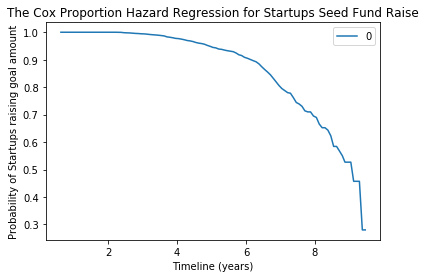

In [95]:
cph.predict_survival_function(a).plot()

plt.title("The Cox Proportion Hazard Regression for Startups Seed Fund Raise")
plt.ylabel("Probability of Startups raising goal amount")
plt.xlabel("Timeline (years)")
plt.show()

In [96]:
two_million['size_numeric'].value_counts()

5       1243
25       595
125       66
350        4
750        2
8000       1
3000       1
Name: size_numeric, dtype: int64